In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df=pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'])
features=['sepal length','sepal width','petal length','petal width']

In [17]:
print(df.head())

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [18]:
x=df.loc[:,features].values
y=df.loc[:,['target']].values
x=StandardScaler().fit_transform(x)

pca=PCA(n_components=2)
principal_components=pca.fit_transform(x)
principal_component_DF=pd.DataFrame(principal_components,columns=['PC1','PC2'])

In [19]:
print(principal_component_DF.head())

        PC1       PC2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767


In [20]:
finalDF=pd.concat([principal_component_DF,df[['target']]],axis=1)

In [21]:
print(finalDF.head())

        PC1       PC2       target
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa


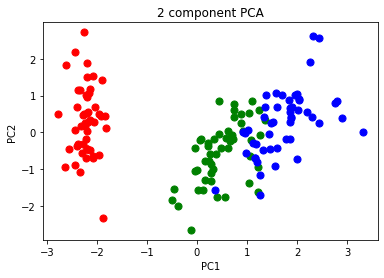

In [22]:
targets=['Iris-setosa','Iris-versicolor', 'Iris-virginica']
colors=['r','g','b']

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2 component PCA")
for target,color in zip(targets,colors):
    ind=finalDF['target']==target
    plt.scatter(finalDF.loc[ind,'PC1'],finalDF.loc[ind,'PC2'],c=color,s=50)
plt.show()